# Description of the idea 

   In this project we will be doing an exploratory analysis to find the best districts in Costa Rica to place 10 locals of a new chain restaurant in the country to do this we are basing our criteria on a market principle of placing similar business together, this is really important since our chain will be new in our country so we’ll like to be near where people are going to eat so we can pop up as a new alternative for them. 
   
   We already know food courts are a good option, but recently the looking for a culinary experience, beyond of what you find in a food court, has started to grow and with it some kind of food markets with different restaurant options, this trend has been developed really organically which means the communities don't plan to have this kind of markets near them but, some restaurants and coffees started migrating to those places to offer a more unique experience to their customers. 
    
   Since these markets are not like projects scheduled to develop per se we cannot find them strictly on the internet like food markets so we will leverage on data to find those places where these markets have started to grow and develop.

# Data

To accomplish these there are some pieces of information well need to find and cast:

- Data base with Costa Rica's city
- Clean dataframe with the cities of interest (urban and semi-urban) and its respective location
- Data frame with nearby venues for each city
- Prepocessed data frame for the KMeans clustering method
- labeled cities with the given tag frm the previos clustering methdo
- Explanatory summary of the clusters of interest



# Methodology 

The methodology and approach for the study is this:
 
   Since Costa Rica is a really small country, and our beaches are really popular around the world we will not reduce our scope only to the GAM (Big Metropolitan Area), we will study all urban and semi-urban cities as a possibility so this will let plan ahead our expansion. So, we’ll start by creating a table with all the geographical information of our cities. One thing to take in consideration is that for our Country this information is not as easy to find compared to cities in the USA, so we'll need to do some research.

   Once we have the location data well do exploratory research for venues near each city with the Four Square API. We organize this data and preprocess it to use a clustering method and find those districts which have a similitude based on food and recreation places. The we examin further the cluser of our interest.


In [1]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



## importing libraries needed

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## formating excel document into processable data

In [3]:
#!wget -q -O 'Nomenclator_U.xlsx' http://sistemas.inec.cr/sitiosen/sitiosen/Archivos/Nomenclator_U.xlsx
cities_df=pd.read_excel('Nomenclator_U.xlsx',sheet_name='SEN_NOMENCLATOR_GEOGRAFICO',skiprows=5)

In [4]:
cities_df.head()

,DTA_II,Id Localidad,Código Provincia,Nombre Provincia,Código Canton,Nombre Canton,Código Distrito,NaN,Nombre Distrito,Nombre Localidad,Nombre Oficial,Nombre Compuesto,Parte Localidad,Parte Distrital,Nota,Codigo Urbanidad,Urbanidad,Codigo Tipologia,Tipologia,Codigo Region,Region,Localizacion,Latitud,Longitud,Decreto OLey,None.1,Segregado,Fecha
0,10101.0,1.0,1.0,San José,101.0,San José,1.0,NaN,Carmen,San José (Parte),San José,Ciudad San José (Parte),NaN,NaN,None,1.0,Urbano,1.0,Ciudad,1.0,Región Central,NaN,"9,93551466","-84,0778084",NaN,NaN,NaN,NaN
1,10101.0,2.0,1.0,San José,101.0,San José,1.0,NaN,Carmen,Amón,Amón,Barrio Amón,NaN,NaN,None,1.0,Urbano,3.0,Barrio,1.0,Región Central,NaN,"9,93773317","-84,0743709",NaN,NaN,NaN,NaN
2,10101.0,3.0,1.0,San José,101.0,San José,1.0,NaN,Carmen,Aranjuez,Aranjuez,Barrio Aranjuez,NaN,NaN,None,1.0,Urbano,3.0,Barrio,1.0,Región Central,NaN,"9,93806376","-84,068946",NaN,NaN,NaN,NaN
3,10102.0,4.0,1.0,San José,101.0,San José,2.0,NaN,Merced,El Carmen,Carmen,Barrio El Carmen,NaN,NaN,None,1.0,Urbano,3.0,Barrio,1.0,Región Central,NaN,"9,93561551","-84,0788672",NaN,NaN,NaN,NaN
4,10101.0,5.0,1.0,San José,101.0,San José,1.0,NaN,Carmen,Empalme,Empalme,Barrio Empalme,NaN,NaN,None,1.0,Urbano,3.0,Barrio,1.0,Región Central,NaN,"9,93248414","-84,0623398",NaN,NaN,NaN,NaN


In [26]:
cities_df.columns

cities_df.T.apply(lambda x: x.nunique(), axis=1)
cities_df.count()

DTA_II              11958
Id Localidad        11958
Código Provincia    11958
Nombre Provincia    11958
Código Canton       11958
Nombre Canton       11958
Código Distrito     11958
NaN                     0
Nombre Distrito     11958
Nombre Localidad    11958
Nombre Oficial       5033
Nombre Compuesto    11958
Parte Localidad      1116
Parte Distrital      1116
Nota                 1116
Codigo Urbanidad    11958
 Urbanidad          11958
Codigo Tipologia    11958
Tipologia           11958
Codigo Region       11958
Region              11958
Localizacion          105
Latitud             11958
Longitud            11958
Decreto OLey         1260
None.1                  0
Segregado            1215
Fecha                1215
dtype: int64

In [27]:
filtered_columns = ['Id Localidad', 'Nombre Provincia', 'Nombre Canton', 'Nombre Distrito', 'Nombre Compuesto',' Urbanidad','Tipologia','Latitud', 'Longitud']
cities_df_short =cities_df.loc[:, filtered_columns]

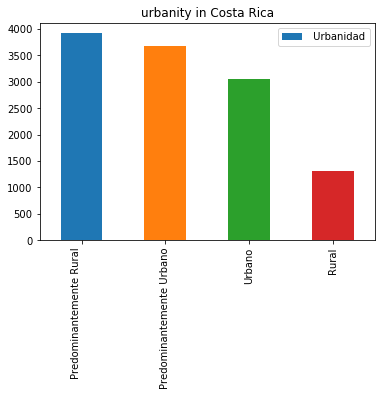

In [176]:
Urbanitty=cities_df_short[' Urbanidad'].value_counts()
ax=Urbanitty.plot(kind='bar', title='urbanity in Costa Rica',color=['C0', 'C1', 'C2', 'C3'],legend=True)

fig = ax.get_figure()
fig.savefig('Urbanity in Costa Rica.jpg')


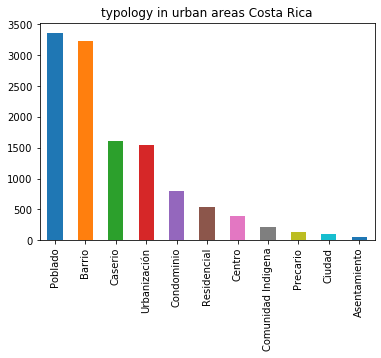

In [183]:
typology=cities_df_short['Tipologia'].value_counts()
ax=typology.plot(kind='bar', title='typology in urban areas Costa Rica',color=['C0', 'C1', 'C2', 'C3','C4', 'C5', 'C6', 'C7','C8', 'C9', 'C10'])#
fig = ax.get_figure()
fig.savefig('typology in urban areas Costa Rica.jpg')
#cities_df_short[' Urbanidad'].value_counts()/11958*100

In [184]:
typology/11958*100

Poblado               28.098344
Barrio                26.986118
Caserio               13.455427
Urbanización          12.870045
Condominio             6.706807
Residencial            4.482355
Centro                 3.219602
Comunidad Indigena     1.848135
Precario               1.112226
Ciudad                 0.786085
Asentamiento           0.434855
Name: Tipologia, dtype: float64

In [29]:
cities_df_urbano = cities_df_short.loc[cities_df_short[' Urbanidad'].isin(['Urbano','Predominantemente Urbano'])].reset_index(drop=True)

In [30]:
cities_df_urbano.head()

,Id Localidad,Nombre Provincia,Nombre Canton,Nombre Distrito,Nombre Compuesto,Urbanidad,Tipologia,Latitud,Longitud
0,1.0,San José,San José,Carmen,Ciudad San José (Parte),Urbano,Ciudad,"9,93551466","-84,0778084"
1,2.0,San José,San José,Carmen,Barrio Amón,Urbano,Barrio,"9,93773317","-84,0743709"
2,3.0,San José,San José,Carmen,Barrio Aranjuez,Urbano,Barrio,"9,93806376","-84,068946"
3,4.0,San José,San José,Merced,Barrio El Carmen,Urbano,Barrio,"9,93561551","-84,0788672"
4,5.0,San José,San José,Carmen,Barrio Empalme,Urbano,Barrio,"9,93248414","-84,0623398"


In [ ]:
cities_df_urbano[' Urbanidad'].value_counts()

In [31]:
cities_df_urbano['Tipologia'].unique()

array(['Ciudad', 'Barrio', 'Condominio', 'Precario', 'Urbanización',
       'Centro', 'Residencial', 'Poblado', 'Caserio',
       'Comunidad Indigena', 'Asentamiento'], dtype=object)

In [32]:
cities_df_urbano_ciudad = cities_df_short.loc[cities_df_short['Tipologia'].isin(['Ciudad','Barrio'])].reset_index(drop=True)
cities_df_urbano_ciudad['Latitud']=cities_df_urbano_ciudad['Latitud'].replace(',','.',regex=True)
cities_df_urbano_ciudad['Longitud']=cities_df_urbano_ciudad['Longitud'].replace(',','.',regex=True)

In [34]:
cities_df_urbano_ciudad.T.apply(lambda x: x.nunique(), axis=1)

Id Localidad        3321
Nombre Provincia       7
Nombre Canton         82
Nombre Distrito      324
Nombre Compuesto    2129
 Urbanidad             4
Tipologia              2
Latitud             3321
Longitud            3320
dtype: int64

## Locating venues nearby

In [43]:
#CLIENT_ID = '025BL4ZTEFQFOJWWJNVU5NHMBSOKQTRFC1SZULJAEADANNHM' # your Foursquare ID
CLIENT_ID = 'NRBMHDFK1GB51ZHAZ5JIOAMWO3NR03N0RPCYH2K0LHMQT1N5'
#CLIENT_SECRET = 'NMDUNIAK3CPD4SB2GKITG5LIB05ZJPDIM1LBOWHYITK3EXAE' # your Foursquare Secret
CLIENT_SECRET = '0IMJTIJU2U54NSDEONDC24O1DYIO1X002RTO0DPGRLPG3TLZ'
VERSION = '20180605' # Foursquare API version
OAUTH_TOKEN='2AKK2QCDKG0JW4OFVXT0KEIOQOV0V2XVKZT4MZFZMF1OHGQ2' 
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('OAUTH_TOKEN:' + OAUTH_TOKEN)
#&oauth_token={}

Your credentails:
CLIENT_ID: NRBMHDFK1GB51ZHAZ5JIOAMWO3NR03N0RPCYH2K0LHMQT1N5
CLIENT_SECRET:0IMJTIJU2U54NSDEONDC24O1DYIO1X002RTO0DPGRLPG3TLZ
OAUTH_TOKEN:2AKK2QCDKG0JW4OFVXT0KEIOQOV0V2XVKZT4MZFZMF1OHGQ2


In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
# cities_venues_cr = getNearbyVenues(names=cities_df_urbano_ciudad['Id Localidad'],
#                                    latitudes=cities_df_urbano_ciudad['Latitud'],
#                                    longitudes=cities_df_urbano_ciudad['Longitud'])
#cities_venues_cr = pd.read_csv('venues.csv',index_col=0)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
123.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
162.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
193.0
194.0
195.0
196.0
197.0
198.0
252.0
254.0
255.0
256.0
257.0
258.0
259.0
260.0
261.0
262.0
263.0
264.0
265.0
266.0
267.0
268.0
269.0
270.0
271.0
272.0
299.0
301.0
302.0
303.0
304.0
305.0
306.0
307.0
308.0
309.0
310.0
311.0
312.0
313.0
314.0
315.0
341.0
343.0
344.0
345.0
346.0
347.0
348.0
349.0
350.0
351.0
352.0
353.0
354.0
355.0
356.0
357.0
358.0
405.0
406.0
407.0
408.0
409.0
410.0
411.0
412.0
413.0
414.0
415.0
416.0
417.0
418.0
419.0
420.0
422.0
423.0
424.0

In [40]:
cities_df_urbano_ciudad.tail()

,Id Localidad,Nombre Provincia,Nombre Canton,Nombre Distrito,Nombre Compuesto,Urbanidad,Tipologia,Latitud,Longitud
3316,12015.0,Limón,Guácimo,Duacarí,Barrio Cartagena,Predominantemente Rural\n,Barrio,10.27553218,-83.628726
3317,12016.0,Limón,Guácimo,Duacarí,Barrio El Infiernillo,Predominantemente Rural\n,Barrio,10.33272959,-83.5944503
3318,12017.0,Limón,Guácimo,Duacarí,Barrio Kilometro Uno,Predominantemente Rural\n,Barrio,10.28566836,-83.6081508
3319,12018.0,Limón,Guácimo,Duacarí,Barrio La Carpio,Predominantemente Rural\n,Barrio,10.28699786,-83.6170038
3320,12019.0,Limón,Guácimo,Duacarí,Barrio La Unión,Predominantemente Rural\n,Barrio,10.32460365,-83.636793


In [48]:
print(cities_venues_cr.shape)
cities_venues_cr.head()
cities_venues_cr.to_csv('venues.csv')

(26521, 7)


In [49]:
print('There are {} uniques categories.'.format(len(cities_venues_cr['Venue Category'].unique())))

There are 398 uniques categories.


In [51]:
cities_venues_cr['Neighborhood'].unique()
cities_venues_cr.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1.0,9.93551466,-84.0778084,Café La Mancha,9.934295,-84.078252,Café
1,1.0,9.93551466,-84.0778084,El Steinvorth,9.934296,-84.078238,Nightclub
2,1.0,9.93551466,-84.0778084,Yogurberry,9.933338,-84.077455,Ice Cream Shop
3,1.0,9.93551466,-84.0778084,Teatro Nacional,9.933170,-84.077362,Theater
4,1.0,9.93551466,-84.0778084,Libreria Internacional,9.933670,-84.078197,Bookstore


## Preprocessing the data to feed the clustering model

In [52]:
# one hot encoding
venues_cr_onehot = pd.get_dummies(cities_venues_cr[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_cr_onehot['Neighborhood'] = cities_venues_cr['Neighborhood'] 
# move neighborhood column to the first column

cols = list(venues_cr_onehot)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Neighborhood')))
venues_cr_onehot = venues_cr_onehot.loc[:, cols]


In [70]:
venues_cr_onehot['Neighborhood'].unique()

array(['Ciudad San José (Parte)', 'Barrio Amón', 'Barrio Aranjuez', ...,
       'Barrio Los Camacho', 'Barrio Pocora Sur', 'Barrio Santa Emilia'],
      dtype=object)

In [53]:
venues_cr_onehot.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Chinese Restaurant,Church,Circus,City,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Classroom,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Country Dance Club,Creperie,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Lab,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Night Market,Nightclub,Nightlife Spot,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piedmontese Restaurant,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Port,Print Shop,Pub,Public Art,Racecourse,Racetrack,Radio Station,Rafting,Record Sh

In [54]:
venues_cr_grouped = venues_cr_onehot.groupby('Neighborhood').mean().reset_index()

In [55]:
venues_cr_grouped.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Chinese Restaurant,Church,Circus,City,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Classroom,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Country Dance Club,Creperie,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Lab,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Night Market,Nightclub,Nightlife Spot,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piedmontese Restaurant,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Port,Print Shop,Pub,Public Art,Racecourse,Racetrack,Radio Station,Rafting,Record Sh

In [120]:
venues_cr_grouped_unique_cities.count()

Latitud           2129
Longitud          2129
Cluster Labels       0
dtype: int64

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Evaluating the most common venues

In [143]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venues_cr_grouped['Neighborhood']

for ind in np.arange(venues_cr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_cr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,Coffee Shop,Ice Cream Shop,Restaurant,Pharmacy,Café,Pizza Place,Department Store,Latin American Restaurant,Shoe Store,Sandwich Place
1,2.0,Café,Bar,Restaurant,Coffee Shop,Art Museum,Spa,Bed & Breakfast,Gastropub,French Restaurant,Supermarket
2,3.0,Bar,Coffee Shop,Restaurant,Boutique,Café,French Restaurant,Art Museum,Concert Hall,Dance Studio,Bistro
3,4.0,Coffee Shop,Ice Cream Shop,Bar,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,Latin American Restaurant,Hotel,Theater,Restaurant
4,5.0,Café,Bar,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place,Ice Cream Shop,Convenience Store,Bistro,Beer Garden


## Elbow method to find optimal cluster numbers

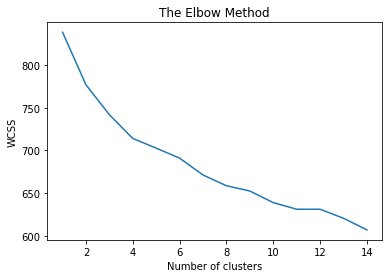

In [128]:
# Using the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

venues_cr_grouped_clustering = venues_cr_grouped.drop('Neighborhood', 1)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(venues_cr_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [187]:
plt.savefig('elbow_method')

<Figure size 432x288 with 0 Axes>

4 u 8 son las mejores opciones para agruparlos

In [151]:
venues_cr_grouped_clustering = venues_cr_grouped.drop('Neighborhood', 1)
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_cr_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 1, 1, 7, 7, 7, 7, 1, 7, 7, 7,
       1, 7, 7, 0, 3, 7, 7, 7, 7, 7, 7, 1, 3, 7, 7, 1, 7, 7], dtype=int32)

In [152]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,Coffee Shop,Ice Cream Shop,Restaurant,Pharmacy,Café,Pizza Place,Department Store,Latin American Restaurant,Shoe Store,Sandwich Place
1,2.0,Café,Bar,Restaurant,Coffee Shop,Art Museum,Spa,Bed & Breakfast,Gastropub,French Restaurant,Supermarket
2,3.0,Bar,Coffee Shop,Restaurant,Boutique,Café,French Restaurant,Art Museum,Concert Hall,Dance Studio,Bistro
3,4.0,Coffee Shop,Ice Cream Shop,Bar,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,Latin American Restaurant,Hotel,Theater,Restaurant
4,5.0,Café,Bar,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place,Ice Cream Shop,Convenience Store,Bistro,Beer Garden


In [150]:
neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop(columns=['Cluster Labels'])

## Tagging each city with the label given by the model

In [153]:
# add clustering labels


neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


cities_merged = cities_df_urbano_ciudad


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.merge(neighborhoods_venues_sorted, right_on='Neighborhood',left_on='Id Localidad')
#cities_merged = cities_merged.merge(neighborhoods_venues_sorted, right_on='Neighborhood',left_on='Id Localidad')
cities_merged.head() 

venues_cr_grouped_merged=venues_cr_grouped.merge(neighborhoods_venues_sorted, on='Neighborhood')

#DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) → 'DataFrame'[source]


In [154]:
cities_merged['Latitud'] = cities_merged['Latitud'].astype(float)
cities_merged['Longitud'] = cities_merged['Longitud'].astype(float)
cities_merged['Cluster Labels'] = cities_merged['Cluster Labels'].astype(int)

In [155]:
cities_merged.head()

,Id Localidad,Nombre Provincia,Nombre Canton,Nombre Distrito,Nombre Compuesto,Urbanidad,Tipologia,Latitud,Longitud,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,San José,San José,Carmen,Ciudad San José (Parte),Urbano,Ciudad,9.935515,-84.077808,7,1.0,Coffee Shop,Ice Cream Shop,Restaurant,Pharmacy,Café,Pizza Place,Department Store,Latin American Restaurant,Shoe Store,Sandwich Place
1,2.0,San José,San José,Carmen,Barrio Amón,Urbano,Barrio,9.937733,-84.074371,7,2.0,Café,Bar,Restaurant,Coffee Shop,Art Museum,Spa,Bed & Breakfast,Gastropub,French Restaurant,Supermarket
2,3.0,San José,San José,Carmen,Barrio Aranjuez,Urbano,Barrio,9.938064,-84.068946,7,3.0,Bar,Coffee Shop,Restaurant,Boutique,Café,French Restaurant,Art Museum,Concert Hall,Dance Studio,Bistro
3,4.0,San José,San José,Merced,Barrio El Carmen,Urbano,Barrio,9.935616,-84.078867,7,4.0,Coffee Shop,Ice Cream Shop,Bar,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,Latin American Restaurant,Hotel,Theater,Restaurant
4,5.0,San José,San José,Carmen,Barrio Empalme,Urbano,Barrio,9.932484,-84.062340,7,5.0,Café,Bar,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place,Ice Cream Shop,Convenience Store,Bistro,Beer Garden


In [157]:
venues_cr_grouped_merged=venues_cr_grouped_merged.iloc[:,:-10]
venues_cr_grouped_merged.head()

,Neighborhood,ATM,Accessories Store,Advertising Agency,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Chinese Restaurant,Church,Circus,City,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Classroom,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Country Dance Club,Creperie,Cruise,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Fabric Shop,Factory,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lebanese Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Lab,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Night Market,Nightclub,Nightlife Spot,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piedmontese Restaurant,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Port,Print Shop,Pub,Public Art,Racecourse,Racetrack,Radio Station,Rafting,Record Sh

In [158]:
#name_id=cities_df_urbano_ciudadold[['Id Localidad', 'Nombre Compuesto']]
venues_cr_grouped_by_tag = venues_cr_grouped_merged.groupby('Cluster Labels').mean().reset_index()

#venues_cr_grouped['Neighborhood'] = cities_venues_cr['Neighborhood'] 

In [159]:
venues_cr_grouped_by_tag=venues_cr_grouped_by_tag.drop(columns=['Neighborhood'])

## rearranging de data, now grouped by tag

In [163]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster Labels']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Cluster Labels'] = venues_cr_grouped_by_tag['Cluster Labels']

for ind in np.arange(venues_cr_grouped_by_tag.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(venues_cr_grouped_by_tag.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Grocery Store,Bar,Restaurant,Soccer Field,Pizza Place
1,1,Bar,Soccer Field,Park,Convenience Store,Bakery
2,2,Restaurant,Bar,Campground,Brewery,Hotel
3,3,Restaurant,Bar,Pizza Place,Soccer Field,Latin American Restaurant
4,4,Convenience Store,Auto Garage,Burger Joint,Plaza,Bakery
5,5,Bus Station,Park,Bakery,Pizza Place,Fried Chicken Joint
6,6,Soccer Field,Grocery Store,Restaurant,Bar,Gym
7,7,Pizza Place,Fast Food Restaurant,Bakery,Bar,Seafood Restaurant
8,8,Mountain,Burger Joint,Steakhouse,Trail,Bakery
9,9,Bar,Soccer Field,Steakhouse,Grocery Store,Restaurant


In [162]:
cities_merged['Cluster Labels'].value_counts()

7     1546
3      353
1      333
0      161
5       95
6       91
2       78
9       73
8       32
4       20
10      13
Name: Cluster Labels, dtype: int64

## Selecting the clusters that better fit our criteria

In [193]:
df1=cities_merged.copy()
df1.columns = [c.replace(' ', '_') for c in df1.columns]
fit_clusters=[2,3,7]
cities_merged_fit=df1[df1.Cluster_Labels.isin(fit_clusters)]

In [199]:
cities_merged_fit.head()

,Id_Localidad,Nombre_Provincia,Nombre_Canton,Nombre_Distrito,Nombre_Compuesto,_Urbanidad,Tipologia,Latitud,Longitud,Cluster_Labels,Neighborhood,1st_Most_Common_Venue,2nd_Most_Common_Venue,3rd_Most_Common_Venue,4th_Most_Common_Venue,5th_Most_Common_Venue,6th_Most_Common_Venue,7th_Most_Common_Venue,8th_Most_Common_Venue,9th_Most_Common_Venue,10th_Most_Common_Venue
0,1.0,San José,San José,Carmen,Ciudad San José (Parte),Urbano,Ciudad,9.935515,-84.077808,7,1.0,Coffee Shop,Ice Cream Shop,Restaurant,Pharmacy,Café,Pizza Place,Department Store,Latin American Restaurant,Shoe Store,Sandwich Place
1,2.0,San José,San José,Carmen,Barrio Amón,Urbano,Barrio,9.937733,-84.074371,7,2.0,Café,Bar,Restaurant,Coffee Shop,Art Museum,Spa,Bed & Breakfast,Gastropub,French Restaurant,Supermarket
2,3.0,San José,San José,Carmen,Barrio Aranjuez,Urbano,Barrio,9.938064,-84.068946,7,3.0,Bar,Coffee Shop,Restaurant,Boutique,Café,French Restaurant,Art Museum,Concert Hall,Dance Studio,Bistro
3,4.0,San José,San José,Merced,Barrio El Carmen,Urbano,Barrio,9.935616,-84.078867,7,4.0,Coffee Shop,Ice Cream Shop,Bar,Sandwich Place,Pizza Place,Vegetarian / Vegan Restaurant,Latin American Restaurant,Hotel,Theater,Restaurant
4,5.0,San José,San José,Carmen,Barrio Empalme,Urbano,Barrio,9.932484,-84.062340,7,5.0,Café,Bar,Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Pizza Place,Ice Cream Shop,Convenience Store,Bistro,Beer Garden


## Mapping the selected clusters

In [201]:
latitude=9.9333296
longitude=-84.0833282
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged_fit['Latitud'], cities_merged_fit['Longitud'], cities_merged_fit['Nombre_Compuesto'], cities_merged_fit['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters